<a href="https://colab.research.google.com/github/haryanealayaar/sunil/blob/main/Machine_Learning_Model_Application_on_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA - STUDENT PERFORMANCE INDICATOR
Problem statement
###This project understands how the student's performance(test scores) is affected by other variables such as:

* gender
* race_ethnicity
* parntal_level_of_education
* lunch
* test_preperation_course
* math_scores
* reading_score
* writng_score

DataSet name:- student excel file.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('/content/StudentsPerformance_3_lyst1729690388778.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#steps to follow :
- check missing values
- check duplicates
- check datatypes
- check no. of unique values
- check statistics
- categorical coloumns.

In [ ]:
#check missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
#check duplicates
df.duplicated().sum()

0

#**Observations**
- no missing values
- no duplicates

In [ ]:
# check unique values
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [ ]:
 #check datatypes
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#check statistics
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#Insight or Observation
- mean
- standard deviation --->14.6 - 15.19
- minimum- 0 in math , 17 in reading , 10 in writing
- maximum - 100


In [ ]:
#explore more info about the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype in (np.int64, np.float64)]

In [ ]:
numerical_features

['math score', 'reading score', 'writing score']

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype in (object, str)]

In [ ]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
df['gender'].value_counts()

,count
gender,
female,518
male,482


In [ ]:
df['race/ethnicity'].value_counts()

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [ ]:
df['Total_score'] = (df['math score'] + df['reading score'] + df['writing score'])
df['Average'] = df ['Total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Average', ylabel='Count'>

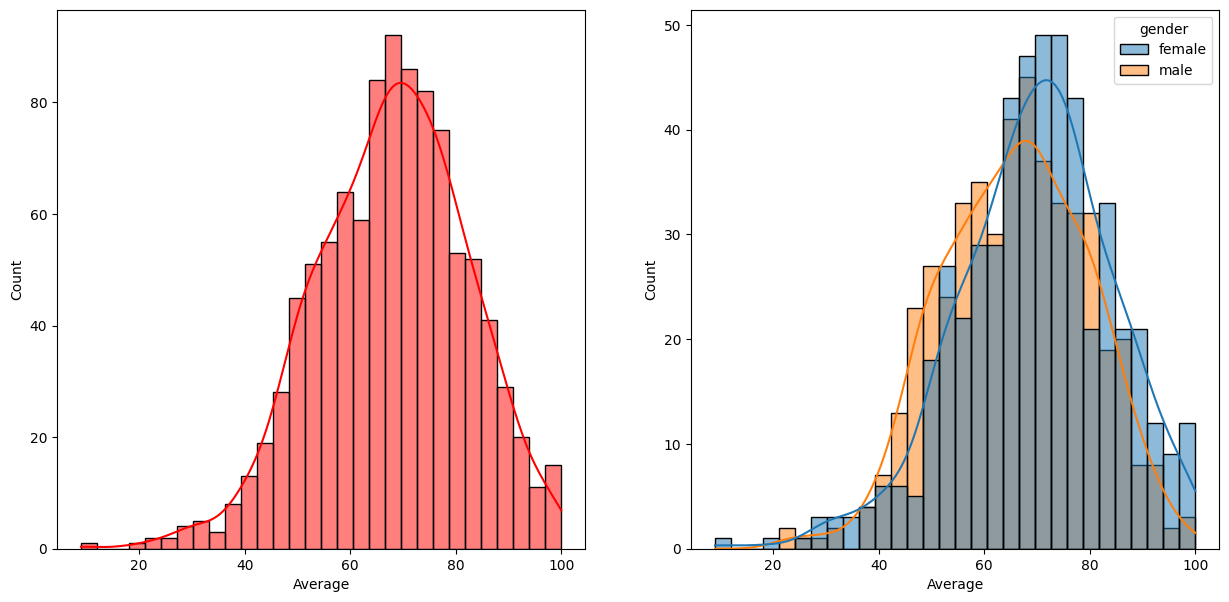

In [ ]:
## exploring more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='red')

plt.subplot(122)
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='gender')

# Insights
- female student tends to perform well than male students


<Axes: xlabel='Average', ylabel='Count'>

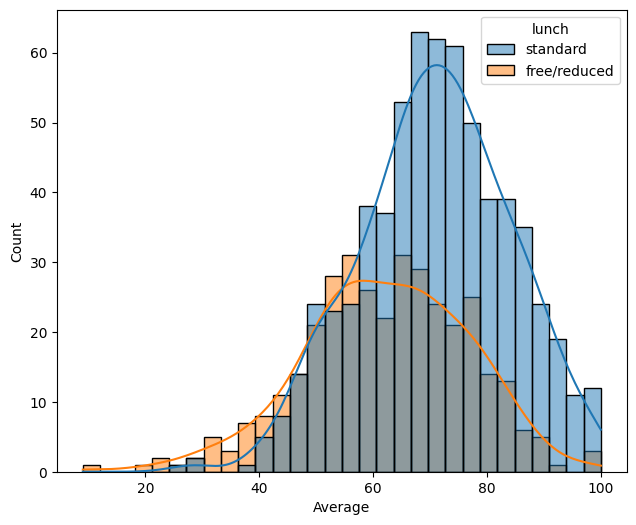

In [ ]:
# now , comparing with 'lunch' category to the Average

fig = plt.figure(figsize=(25, 6)) # set figsize for the entire figure

#create subplots using add_subplot
ax1 = fig.add_subplot(1, 3, 1)

#plot on the specific subplot
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='lunch', ax=ax1)

<Axes: xlabel='Average', ylabel='Count'>

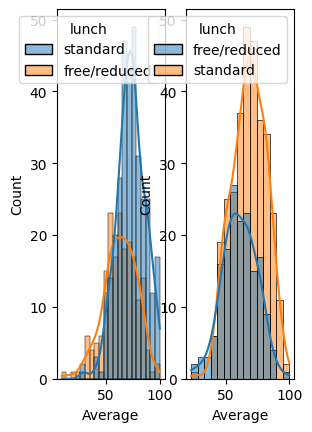

In [ ]:
#comparison between male and female
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')

# Insight
- standard lunch student perform well in exams
- stadard lunch help perfom well exam be it a male or female


<Axes: xlabel='Average', ylabel='Count'>

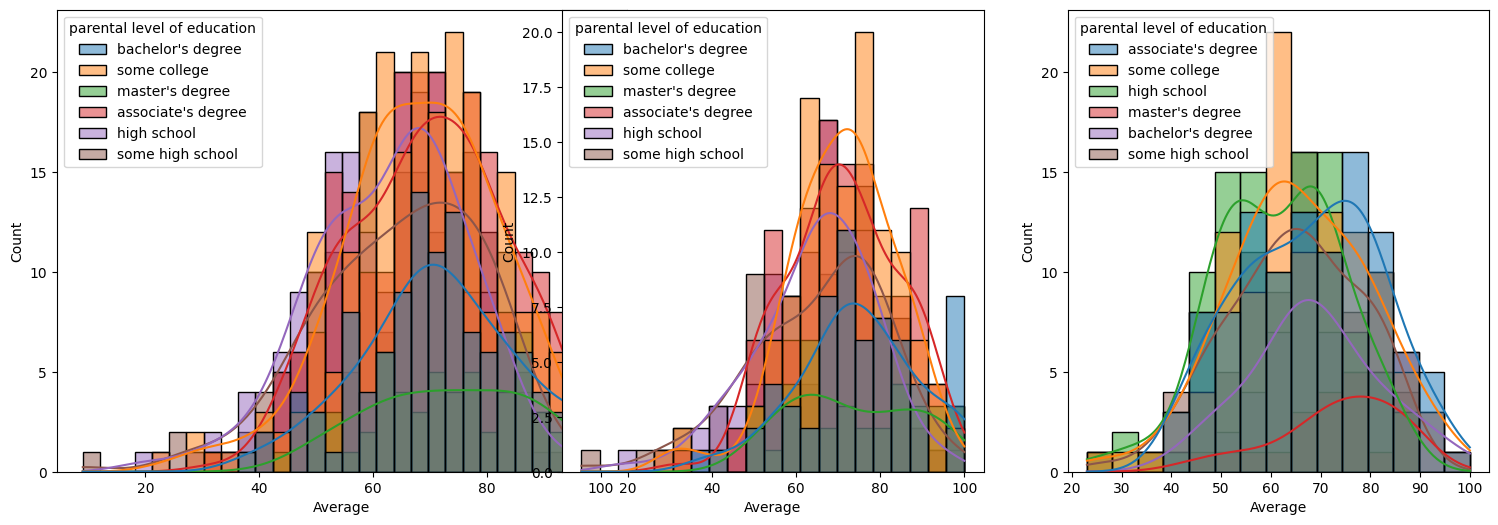

In [ ]:
# now, comparing wirh 'parental_level_of_education' category

fig = plt.figure(figsize=(25,6)) #set figsize for the figure
plt.subplot(1,3,1) #Corrected subplot call
sns.histplot(data=df, x='Average', bins=30, kde=True, hue='parental level of education')

plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='parental level of education')

plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='parental level of education')

# Insights
-  In general , parents education don't help much for student perform well in xam
- In 2nd plot , there is no effect of parents education on female  students
- in 3rd plot , whose parents education is of assocoates degree or master's degree their male child tend to perform well in Exam


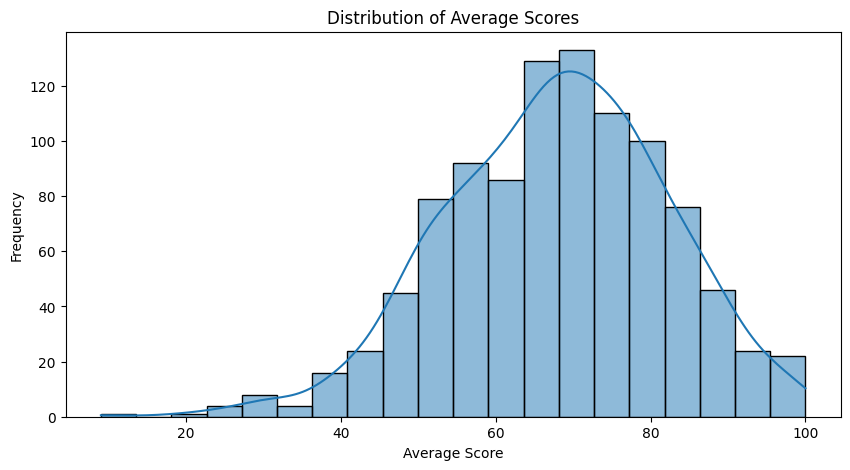

In [ ]:
# Visualizing distributions
plt.figure(figsize=(10,5))
sns.histplot(df['Average'], bins=20, kde=True)
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Frequency")
plt.show()

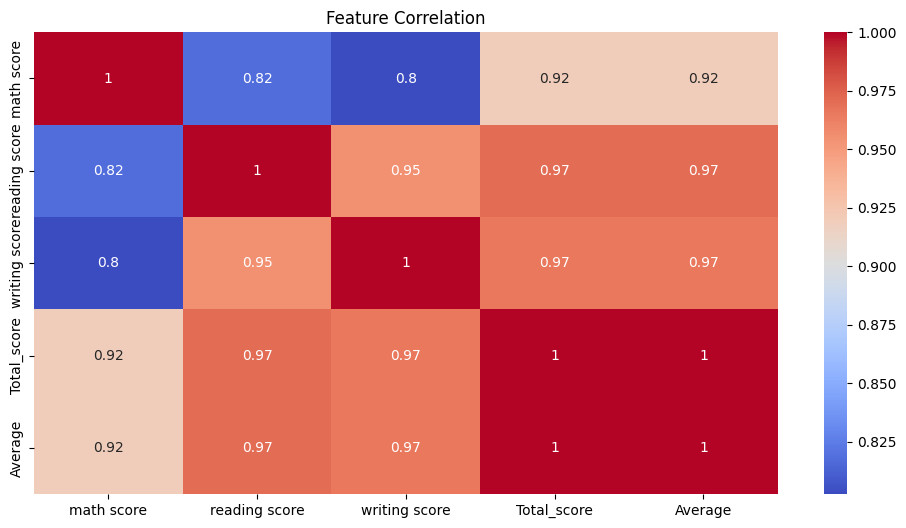

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
# Include only numerical features in the correlation calculation
num_df = df.select_dtypes(include=['number'])
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [ ]:
# Identify numerical and categorical features
num_features = ['StudyHours', 'Attendance', 'PreviousGrades']
cat_features = ['Gender', 'ParentEducation', 'SchoolType']

In [ ]:
# Define transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [ ]:
# Define target variable
X = df.drop(columns=['Average'], errors ='ignore')
y = df['Average']

In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed ✅")

Data preprocessing completed ✅


In [ ]:
# Identify numerical and categorical features
num_features = ['math score', 'reading score', 'writing score']  # Changed to actual numerical features
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']  # Changed to actual categorical features

# Define transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [ ]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model to the training data
model.fit(X_train, y_train)  # This line is added to fit the model

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
 #Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.52
Mean Squared Error: 1.28
R² Score: 0.99


In [ ]:
# Define hyperparameters to tune
param_grid = {
    "regressor__n_estimators": [50, 100, 200],
    "regressor__max_depth": [None, 10, 20],
}


In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['math '
                                                                          'score',
                                                                          'reading '
                                                                          'score',
                                                                          'writing '
                                                                          'score']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'race/ethnicity',
                                                                          'parental '
                                                                          'level '
                                                                          'of '
                                                                          'education',
                                                                          'lunch',
                                                                          'test '
                                                                          'preparation '
                                                                          'course'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [ ]:
# Best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(f"Best Model R² Score: {r2_score(y_test, y_pred_best):.2f}")

Best Model R² Score: 0.99


# Student Performance Indicator Project

This project explores how different factors affect student test scores. We look at things like:

*   **Gender:** Are there differences in scores between male and female students?
*   **Race/Ethnicity:** Does a student's racial or ethnic background play a role?
*   **Parental Education:** Does the level of education of a student's parents matter?
*   **Lunch:** Does having a standard lunch or a free/reduced lunch affect scores?
*   **Test Preparation:** Does taking a test preparation course make a difference?
*   **Scores:** We analyze math, reading, and writing scores.

## What we did:

1.  **Loaded the data:** We started by loading the student data from a CSV file.
2.  **Checked the data:** We looked for missing information and duplicates to make sure the data was clean. We also checked the types of data (like numbers or text) and how many unique values were in each column.
3.  **Calculated scores:** We added up the math, reading, and writing scores to get a total score and then calculated the average score for each student.
4.  **Visualized the data:** We created charts to see how the average scores were distributed and how they related to different factors like gender, lunch type, and parental education.
5.  **Built a model:** We used the data to build a machine learning model that can predict student performance based on the other factors.
6.  **Evaluated the model:** We checked how well our model made predictions.

## Key Findings:

*   Female students tended to perform better than male students on average.
*   Students who had a standard lunch generally performed better on exams.
*   Parental education seemed to have less impact on female students' performance, but male students with parents who had associate's or master's degrees tended to perform better.
*   Math, reading, and writing scores are highly correlated with each other.

## How to use this project:

You can run the code in this notebook to see how we performed the analysis and built the model. The code includes steps for data loading, cleaning, visualization, and model training.